## Macrorheology

As the material model is based on microscopic parameters and not on macroscopic parameters (as e.g. the bulk stiffness), the material parameters cannot directly be measured using a rheometer. Instead the rheological experiments are "simulated" on the material model and the resulting curves can be used to fit the material parameters so that the the "simulated" rheological experiments on the material model fit the measured rheological response of the material.

Here, we describe three different rheological experiments that can be simulated on the material model.

- Shear Rheometer
- Stretch Thinning
- Extensional Rheometer
    
The stretch experiment is needed to reliably fit later on the buckling of the material and either the Shear Rheometer or the Extensional Rheometer experiment can be used to fit the fiber stiffness and the strain stiffening.

This section first describes the functions that simulate these experiments on the material model and the next section explains how these functions can be used to fit the material parameters from experimental data.

In [1]:
%matplotlib inline

### Shear Rheometer

SemiAffineFiberMaterial(k=900, d0=0.0004, lambda_s=1.0075, ds=0.033)


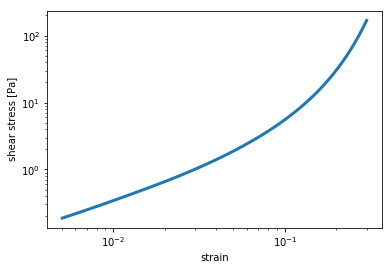

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from saenopy import macro
from saenopy.materials import SemiAffineFiberMaterial

material = SemiAffineFiberMaterial(900, 0.0004, 1.0075, 0.033)
print(material)

gamma = np.arange(0.005, 0.3, 0.0001)
x, y = macro.getShearRheometerStress(gamma, material)
plt.loglog(x, y, "-", lw=3, label="model")

plt.xlabel("strain")
plt.ylabel("shear stress [Pa]")

plt.show()

### Stretcher

SemiAffineFiberMaterial(k=900, d0=0.0004, lambda_s=1.0075, ds=0.033)


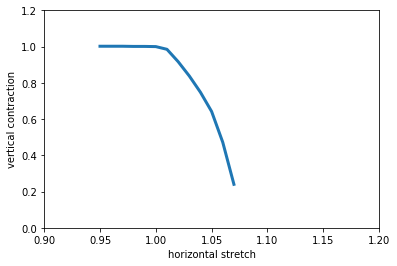

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from saenopy import macro
from saenopy.materials import SemiAffineFiberMaterial

material = SemiAffineFiberMaterial(900, 0.0004, 1.0075, 0.033)
print(material)

lambda_h = np.arange(1-0.05, 1+0.07, 0.01)
lambda_v = np.arange(0, 1.1, 0.001)

x, y = macro.getStretchThinning(lambda_h, lambda_v, material)
plt.plot(x, y, lw=3, label="model")
plt.xlabel("horizontal stretch")
plt.ylabel("vertical contraction")

plt.ylim(0, 1.2)
plt.xlim(0.9, 1.2)

plt.show()

### Extensional Rheometer

SemiAffineFiberMaterial(k=900, d0=0.0004, lambda_s=1.0075, ds=0.033)


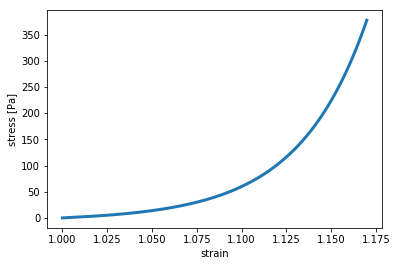

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from saenopy import macro
from saenopy.materials import SemiAffineFiberMaterial, LinearMaterial

material = SemiAffineFiberMaterial(900, 0.0004, 1.0075, 0.033)
print(material)

epsilon = np.arange(1, 1.17, 0.0001)
x, y = macro.getExtensionalRheometerStress(epsilon, material)
plt.plot(x, y, lw=3, label="model")

plt.xlabel("strain")
plt.ylabel("stress [Pa]")

plt.show()

## Fitting material parameters

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


[0.00120286 0.00251333 0.01649371 0.13975351 0.06731848]


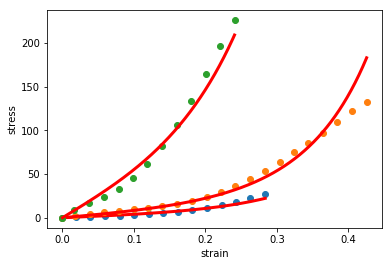

In [8]:
from saenopy import macro
import numpy as np

# example data, stress-strain curves for collagen of three different concentrations    
data0_6 = np.array([[4.27e-06,-2.26e-03],[1.89e-02,5.90e-01],[3.93e-02,1.08e+00],[5.97e-02,1.57e+00],[8.01e-02,2.14e+00],[1.00e-01,2.89e+00],[1.21e-01,3.83e+00],[1.41e-01,5.09e+00],[1.62e-01,6.77e+00],[1.82e-01,8.94e+00],[2.02e-01,1.17e+01],[2.23e-01,1.49e+01],[2.43e-01,1.86e+01],[2.63e-01,2.28e+01],[2.84e-01,2.71e+01]])
data1_2 = np.array([[1.22e-05,-1.61e-01],[1.71e-02,2.57e+00],[3.81e-02,4.69e+00],[5.87e-02,6.34e+00],[7.92e-02,7.93e+00],[9.96e-02,9.56e+00],[1.20e-01,1.14e+01],[1.40e-01,1.35e+01],[1.61e-01,1.62e+01],[1.81e-01,1.97e+01],[2.02e-01,2.41e+01],[2.22e-01,2.95e+01],[2.42e-01,3.63e+01],[2.63e-01,4.43e+01],[2.83e-01,5.36e+01],[3.04e-01,6.37e+01],[3.24e-01,7.47e+01],[3.44e-01,8.61e+01],[3.65e-01,9.75e+01],[3.85e-01,1.10e+02],[4.06e-01,1.22e+02],[4.26e-01,1.33e+02]])
data2_4 = np.array([[2.02e-05,-6.50e-02],[1.59e-02,8.46e+00],[3.76e-02,1.68e+01],[5.82e-02,2.43e+01],[7.86e-02,3.34e+01],[9.90e-02,4.54e+01],[1.19e-01,6.11e+01],[1.40e-01,8.16e+01],[1.60e-01,1.06e+02],[1.80e-01,1.34e+02],[2.01e-01,1.65e+02],[2.21e-01,1.96e+02],[2.41e-01,2.26e+02]])

# hold the buckling parameter constant, as it cannot be deferimed well with shear experiments
ds0 = 0.0004
# minimize 3 shear rheometer experiments with different collagen concentration and, therefore, different k1 parameters
# but keep the other paramters the same
parameters, plot = macro.minimize([
        [macro.getShearRheometerStress, data0_6, lambda p: (p[0], ds0, p[3], p[4])],
        [macro.getShearRheometerStress, data1_2, lambda p: (p[1], ds0, p[3], p[4])],
        [macro.getShearRheometerStress, data2_4, lambda p: (p[2], ds0, p[3], p[4])],
    ],
    [8.67164562e+02, 1.82057898e+03, 1.20550904e+04, 1.33085139e-02,
 9.27860552e-02],
)

# print the resulting parameters
print(parameters)
# and plot the results
plot()

To fit all parameters, experiments of different types should be combined, e.g. a shear rheological experiment and a stretching experiment.

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


[9.38578108e+02 4.31717212e-04 8.69679652e-01 3.79087025e-01]


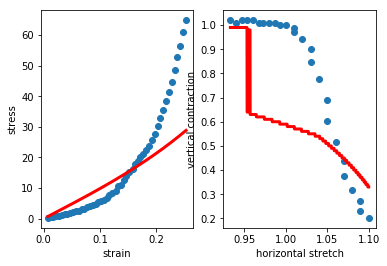

In [11]:
from saenopy import macro
import numpy as np

# example data, stress-strain curves and a stretch experiment
shear = np.array([[7.50e-03,2.78e-01],[1.25e-02,4.35e-01],[1.75e-02,6.44e-01],[2.25e-02,7.86e-01],[2.75e-02,9.98e-01],[3.25e-02,1.13e+00],[3.75e-02,1.52e+00],[4.25e-02,1.57e+00],[4.75e-02,1.89e+00],[5.25e-02,2.10e+00],[5.75e-02,2.46e+00],[6.25e-02,2.67e+00],[6.75e-02,3.15e+00],[7.25e-02,3.13e+00],[7.75e-02,3.83e+00],[8.25e-02,4.32e+00],[8.75e-02,4.35e+00],[9.25e-02,4.78e+00],[9.75e-02,5.45e+00],[1.02e-01,5.87e+00],[1.07e-01,6.16e+00],[1.13e-01,6.89e+00],[1.17e-01,7.89e+00],[1.22e-01,8.28e+00],[1.28e-01,9.13e+00],[1.33e-01,1.06e+01],[1.38e-01,1.10e+01],[1.42e-01,1.27e+01],[1.47e-01,1.39e+01],[1.52e-01,1.53e+01],[1.58e-01,1.62e+01],[1.63e-01,1.78e+01],[1.68e-01,1.89e+01],[1.72e-01,2.03e+01],[1.77e-01,2.13e+01],[1.82e-01,2.23e+01],[1.88e-01,2.38e+01],[1.93e-01,2.56e+01],[1.98e-01,2.78e+01],[2.03e-01,3.02e+01],[2.07e-01,3.28e+01],[2.12e-01,3.55e+01],[2.17e-01,3.83e+01],[2.23e-01,4.13e+01],[2.28e-01,4.48e+01],[2.33e-01,4.86e+01],[2.37e-01,5.27e+01],[2.42e-01,5.64e+01],[2.47e-01,6.08e+01],[2.53e-01,6.48e+01],[2.58e-01,6.93e+01],[2.63e-01,7.44e+01],[2.68e-01,7.89e+01],[2.73e-01,8.40e+01],[2.78e-01,8.91e+01],[2.82e-01,9.41e+01],[2.87e-01,1.01e+02],[2.92e-01,1.07e+02],[2.97e-01,1.12e+02],[3.02e-01,1.19e+02],[3.07e-01,1.25e+02],[3.12e-01,1.32e+02],[3.18e-01,1.39e+02],[3.23e-01,1.45e+02],[3.28e-01,1.53e+02],[3.33e-01,1.60e+02],[3.38e-01,1.67e+02],[3.43e-01,1.76e+02],[3.47e-01,1.83e+02],[3.52e-01,1.90e+02],[3.57e-01,1.99e+02],[3.62e-01,2.06e+02],[3.67e-01,2.15e+02],[3.72e-01,2.23e+02],[3.78e-01,2.31e+02],[3.83e-01,2.40e+02],[3.88e-01,2.48e+02],[3.93e-01,2.56e+02],[3.98e-01,2.56e+02],[4.03e-01,2.73e+02],[4.07e-01,2.77e+02],[4.12e-01,2.86e+02],[4.17e-01,2.97e+02],[4.22e-01,3.08e+02],[4.27e-01,3.15e+02],[4.32e-01,3.25e+02],[4.38e-01,3.33e+02],[4.43e-01,3.39e+02],[4.48e-01,3.51e+02],[4.53e-01,3.59e+02],[4.58e-01,3.69e+02],[4.63e-01,3.76e+02],[4.68e-01,3.83e+02],[4.72e-01,3.93e+02],[4.77e-01,3.97e+02],[4.82e-01,4.04e+02],[4.87e-01,4.13e+02],[4.92e-01,4.18e+02],[4.97e-01,4.31e+02],[5.02e-01,4.38e+02],[5.07e-01,4.25e+02],[5.12e-01,4.48e+02],[5.17e-01,4.49e+02],[5.22e-01,4.56e+02],[5.27e-01,4.66e+02],[5.32e-01,4.70e+02],[5.37e-01,4.76e+02],[5.42e-01,4.82e+02],[5.47e-01,4.89e+02],[5.52e-01,4.99e+02],[5.57e-01,5.01e+02],[5.62e-01,5.06e+02],[5.68e-01,5.14e+02],[5.73e-01,5.15e+02],[5.78e-01,5.21e+02],[5.83e-01,5.28e+02],[5.88e-01,5.30e+02],[5.93e-01,5.38e+02],[5.98e-01,5.40e+02],[6.03e-01,5.41e+02],[6.08e-01,5.38e+02],[6.13e-01,5.39e+02],[6.18e-01,5.50e+02],[6.23e-01,5.56e+02],[6.27e-01,5.59e+02],[6.32e-01,5.68e+02],[6.37e-01,5.69e+02],[6.42e-01,5.70e+02],[6.47e-01,5.79e+02],[6.52e-01,5.78e+02],[6.57e-01,5.80e+02],[6.62e-01,5.83e+02],[6.67e-01,5.83e+02],[6.72e-01,5.89e+02],[6.77e-01,5.86e+02],[6.82e-01,5.88e+02],[6.88e-01,5.91e+02],[6.93e-01,5.86e+02],[6.98e-01,5.91e+02],[7.03e-01,5.91e+02],[7.08e-01,5.87e+02],[7.13e-01,5.89e+02],[7.18e-01,5.88e+02],[7.23e-01,5.89e+02],[7.28e-01,5.89e+02],[7.33e-01,5.81e+02],[7.38e-01,5.85e+02],[7.43e-01,5.86e+02],[7.48e-01,5.78e+02],[7.52e-01,5.78e+02],[7.57e-01,5.79e+02],[7.62e-01,5.76e+02],[7.67e-01,5.74e+02],[7.72e-01,5.70e+02],[7.77e-01,5.73e+02],[7.82e-01,5.70e+02],[7.87e-01,5.66e+02],[7.92e-01,5.69e+02],[7.97e-01,5.59e+02],[8.02e-01,5.50e+02],[8.07e-01,5.52e+02],[8.12e-01,5.52e+02],[8.18e-01,5.59e+02],[8.23e-01,5.58e+02],[8.28e-01,5.57e+02],[8.33e-01,5.59e+02],[8.38e-01,5.53e+02],[8.43e-01,5.55e+02],[8.48e-01,5.56e+02],[8.53e-01,5.49e+02],[8.58e-01,5.50e+02],[8.63e-01,5.47e+02],[8.68e-01,5.22e+02],[8.73e-01,5.44e+02],[8.77e-01,5.36e+02],[8.82e-01,5.38e+02],[8.87e-01,5.33e+02],[8.92e-01,5.28e+02],[8.97e-01,5.30e+02],[9.02e-01,5.23e+02],[9.07e-01,5.22e+02],[9.12e-01,5.18e+02],[9.17e-01,5.12e+02],[9.22e-01,5.11e+02],[9.27e-01,5.05e+02],[9.32e-01,5.03e+02],[9.38e-01,4.99e+02],[9.43e-01,4.88e+02],[9.48e-01,4.86e+02],[9.53e-01,4.82e+02],[9.58e-01,4.73e+02],[9.63e-01,4.70e+02],[9.68e-01,4.61e+02],[9.73e-01,4.56e+02],[9.78e-01,4.51e+02],[9.83e-01,4.41e+02],[9.88e-01,4.36e+02],[9.93e-01,4.22e+02],[9.98e-01,4.09e+02],[1.00e+00,4.07e+02]])[:50]
stretch = np.array([[9.33e-01,1.02e+00],[9.40e-01,1.01e+00],[9.47e-01,1.02e+00],[9.53e-01,1.02e+00],[9.60e-01,1.02e+00],[9.67e-01,1.01e+00],[9.73e-01,1.01e+00],[9.80e-01,1.01e+00],[9.87e-01,1.01e+00],[9.93e-01,1.00e+00],[1.00e+00,1.00e+00],[1.01e+00,9.89e-01],[1.01e+00,9.70e-01],[1.02e+00,9.41e-01],[1.03e+00,9.00e-01],[1.03e+00,8.46e-01],[1.04e+00,7.76e-01],[1.05e+00,6.89e-01],[1.05e+00,6.02e-01],[1.06e+00,5.17e-01],[1.07e+00,4.39e-01],[1.07e+00,3.74e-01],[1.08e+00,3.17e-01],[1.09e+00,2.72e-01],[1.09e+00,2.30e-01],[1.10e+00,2.02e-01]])

# fit all 4 parameters simultaneously to two experiments
parameters, plot = macro.minimize([
        [macro.getShearRheometerStress, shear, lambda p: (p[0], p[1], p[2], p[3])],
        [macro.getStretchThinning, stretch, lambda p: (p[0], p[1], p[2], p[3])],
    ],
    [900, 0.0004, 1.075, 0.33],
)

# print the resulting parameters
print(parameters)
# and plot the results
plot()